In [1]:
import numpy as np
import pandas as pds
import os
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from os import listdir
import time    

%matplotlib inline


In [3]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def augment_data(file_dir, n_generated_samples, save_to_dir):
    
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    for filename in os.listdir(file_dir):
        img_path = os.path.join(file_dir, filename)
        img = load_img(img_path)  
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in data_gen.flow(x, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix="aug", save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break



In [4]:
augmented_data_path = '/kaggle/working/train_no_augmented'
no_path = "/kaggle/input/brain-tumor-yes-no/Training_new/no"
os.makedirs(augmented_data_path, exist_ok=True)
augment_data(file_dir=no_path, n_generated_samples=5, save_to_dir=augmented_data_path)

In [5]:
augmented_data_path = '/kaggle/working/test_no_augmented'
no_path = "/kaggle/input/brain-tumor-yes-no/testing_new/no"
os.makedirs(augmented_data_path, exist_ok=True)
augment_data(file_dir=no_path, n_generated_samples=2, save_to_dir=augmented_data_path)

In [41]:
from pathlib import Path

In [42]:

test_yes_dir = Path("/kaggle/input/brain-tumor-yes-no/testing_new/yes")
test_no_dir = Path("/kaggle/working/test_no_augmented")
test_yes_filepaths = list(test_yes_dir.glob('**/*.jpg'))
test_yes_labels = ['yes'] * len(test_yes_filepaths)

test_no_filepaths = list(test_no_dir.glob('**/*.jpg'))
test_no_labels = ['no'] * len(test_no_filepaths)


test_filepaths = test_yes_filepaths + test_no_filepaths
test_labels = test_yes_labels + test_no_labels


test_df = pd.DataFrame({'Filepaths': test_filepaths, 'Labels': test_labels})



In [43]:
print(test_df)

                                             Filepaths Labels
0    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
1    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
2    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
3    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
4    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
..                                                 ...    ...
611   /kaggle/working/test_no_augmented/aug_0_9809.jpg     no
612   /kaggle/working/test_no_augmented/aug_0_7638.jpg     no
613   /kaggle/working/test_no_augmented/aug_0_3847.jpg     no
614   /kaggle/working/test_no_augmented/aug_0_1146.jpg     no
615   /kaggle/working/test_no_augmented/aug_0_6753.jpg     no

[616 rows x 2 columns]


In [9]:
print(len(test_df))

616


In [44]:

train_yes_dir = Path("/kaggle/input/brain-tumor-yes-no/Training_new/yes")
train_no_dir = Path("/kaggle/working/train_no_augmented")
train_yes_filepaths = list(train_yes_dir.glob('**/*.jpg'))
train_yes_labels = ['yes'] * len(train_yes_filepaths)

train_no_filepaths = list(train_no_dir.glob('**/*.jpg'))
train_no_labels = ['no'] * len(train_no_filepaths)

train_filepaths = train_yes_filepaths + train_no_filepaths
train_labels = train_yes_labels + train_no_labels


train_df = pd.DataFrame({'Filepaths': train_filepaths, 'Labels': train_labels})



In [45]:
print(train_df)

                                              Filepaths Labels
0     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
1     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
2     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
3     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
...                                                 ...    ...
4583  /kaggle/working/train_no_augmented/aug_0_4100.jpg     no
4584  /kaggle/working/train_no_augmented/aug_0_4251.jpg     no
4585  /kaggle/working/train_no_augmented/aug_0_3809.jpg     no
4586  /kaggle/working/train_no_augmented/aug_0_6993.jpg     no
4587  /kaggle/working/train_no_augmented/aug_0_5879.jpg     no

[4588 rows x 2 columns]


In [46]:
train_df = train_df.sample(frac=1).reset_index(drop = True)

In [47]:
print(train_df)

                                              Filepaths Labels
0     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
1     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
2     /kaggle/working/train_no_augmented/aug_0_5781.jpg     no
3     /kaggle/working/train_no_augmented/aug_0_5298.jpg     no
4     /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
...                                                 ...    ...
4583  /kaggle/working/train_no_augmented/aug_0_1222.jpg     no
4584  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4585  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4586  /kaggle/working/train_no_augmented/aug_0_6884.jpg     no
4587  /kaggle/working/train_no_augmented/aug_0_6276.jpg     no

[4588 rows x 2 columns]


In [48]:
test_df = test_df.sample(frac=1).reset_index(drop = True)

In [49]:
print(test_df)

                                             Filepaths Labels
0    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
1     /kaggle/working/test_no_augmented/aug_0_3223.jpg     no
2    /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
3     /kaggle/working/test_no_augmented/aug_0_6457.jpg     no
4     /kaggle/working/test_no_augmented/aug_0_6735.jpg     no
..                                                 ...    ...
611  /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
612  /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
613  /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
614   /kaggle/working/test_no_augmented/aug_0_3861.jpg     no
615   /kaggle/working/test_no_augmented/aug_0_3864.jpg     no

[616 rows x 2 columns]


In [50]:
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop = True)
display(df)
print(df.shape)
print(df['Labels'].value_counts())

,Filepaths,Labels
0,/kaggle/input/brain-tumor-yes-no/Training_new/...,yes
1,/kaggle/input/brain-tumor-yes-no/Training_new/...,yes
2,/kaggle/working/train_no_augmented/aug_0_5781.jpg,no
3,/kaggle/working/train_no_augmented/aug_0_5298.jpg,no
4,/kaggle/input/brain-tumor-yes-no/Training_new/...,yes
...,...,...
5199,/kaggle/input/brain-tumor-yes-no/testing_new/y...,yes
5200,/kaggle/input/brain-tumor-yes-no/testing_new/y...,yes
5201,/kaggle/input/brain-tumor-yes-no/testing_new/y...,yes
5202,/kaggle/working/test_no_augmented/aug_0_3861.jpg,no


(5204, 2)
Labels
yes    2779
no     2425
Name: count, dtype: int64


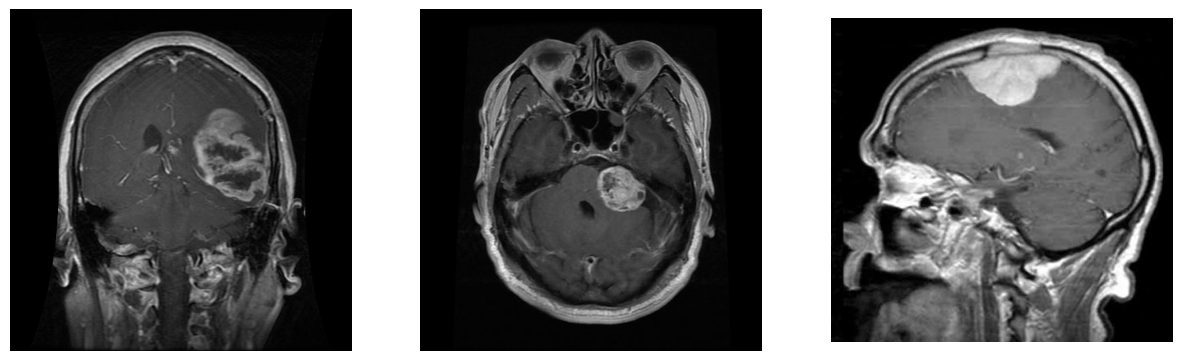

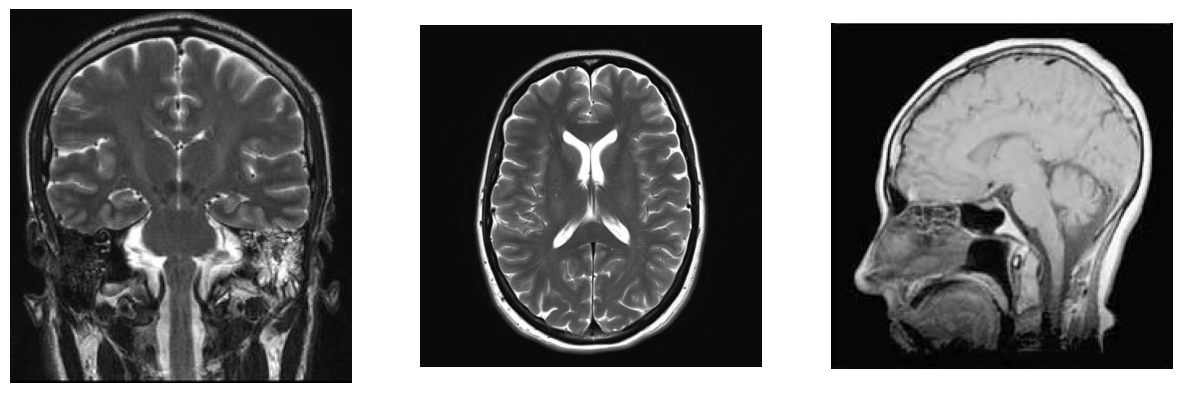

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


yes_tumor_paths = ['/kaggle/input/brain-tumor-yes-no/Training_new/yes/gg (352).jpg', '/kaggle/input/brain-tumor-yes-no/Training_new/yes/m1(51).jpg', '/kaggle/input/brain-tumor-yes-no/Training_new/yes/m1(145).jpg']
no_tumor_paths = ['/kaggle/input/brain-tumor-yes-no/Training_new/no/image(81).jpg', '/kaggle/input/brain-tumor-yes-no/Training_new/no/6.jpg', '/kaggle/input/brain-tumor-yes-no/Training_new/no/image(106).jpg']

def plot_mri_scans(image_paths, label):
    plt.figure(figsize=(15, 5))

    for i, path in enumerate(image_paths, 1):
        plt.subplot(1, len(image_paths), i)
        img = mpimg.imread(path)
        plt.imshow(img, cmap='gray')
      
        plt.axis('off')

    plt.show()


plot_mri_scans(yes_tumor_paths, 'Yes Tumor')


plot_mri_scans(no_tumor_paths, 'No Tumor')


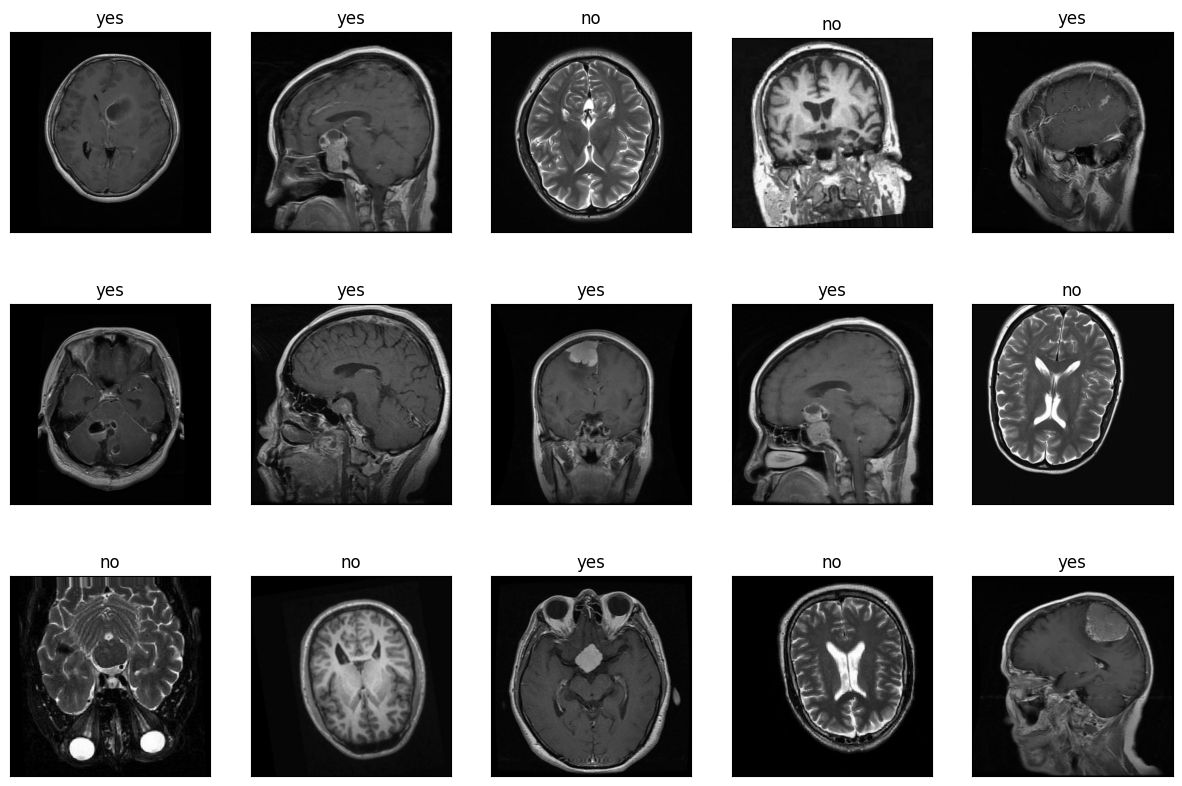

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepaths[i]))
    ax.set_title(df.Labels[i])
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.80, shuffle=True, random_state=1)

In [54]:
print(train_df)

                                              Filepaths Labels
4024  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
1724  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4446   /kaggle/working/train_no_augmented/aug_0_915.jpg     no
3983  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
2747  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
...                                                 ...    ...
905   /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
5192  /kaggle/input/brain-tumor-yes-no/testing_new/y...    yes
3980   /kaggle/working/train_no_augmented/aug_0_126.jpg     no
235    /kaggle/working/train_no_augmented/aug_0_118.jpg     no
5157    /kaggle/working/test_no_augmented/aug_0_138.jpg     no

[4163 rows x 2 columns]


In [55]:
print(test_df)

                                              Filepaths Labels
1272  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
1986  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
2508  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4432    /kaggle/working/train_no_augmented/aug_0_84.jpg     no
1919  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
...                                                 ...    ...
2940  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
3465  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
685   /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
4135  /kaggle/input/brain-tumor-yes-no/Training_new/...    yes
789    /kaggle/working/train_no_augmented/aug_0_105.jpg     no

[1041 rows x 2 columns]


In [56]:
train_df['Filepaths'] = train_df['Filepaths'].astype(str)

In [57]:
test_df['Filepaths'] = test_df['Filepaths'].astype(str)

In [58]:
import tensorflow as tf
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
   
    validation_split=0.15,
    rescale=1.0/255.0,  
    featurewise_center=True,  
    featurewise_std_normalization=True 
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
   
    rescale=1.0/255.0, 
    featurewise_center=True,  
    featurewise_std_normalization=True 
)

In [59]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    
    class_mode='binary',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 3539 validated image filenames belonging to 2 classes.


In [60]:
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
  
    class_mode='binary',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 624 validated image filenames belonging to 2 classes.


In [61]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
   
    class_mode='binary',
    batch_size=4,
    shuffle=False
)

Found 1041 validated image filenames belonging to 2 classes.


In [62]:
img_shape = (224,224,3)
from keras.applications import EfficientNetB3
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout
from keras.optimizers import Adamax
from keras.regularizers import L1, L2


In [63]:

base_model = EfficientNetB3(weights='/kaggle/input/efffficientnet/efficientnetb3_notop.h5', include_top=False, input_shape = img_shape, pooling= 'max')

model_efficientnet = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=L2(l=0.016), activity_regularizer=L1(0.006),
          bias_regularizer=L1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(1, activation='sigmoid')  
])

model_efficientnet.compile(Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']) 


In [64]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


In [ ]:
#pip install --upgrade tensorflow


In [ ]:
#!pip uninstall keras
#!pip install keras==2.15.0


In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler_function(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1) 
learning_rate_scheduler = LearningRateScheduler(scheduler_function)

history_efficientnet = model_efficientnet.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[early_stopping, learning_rate_scheduler],
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0}
)

Epoch 1/30


2024-01-14 13:51:47.515014: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


885/885 [==============================] - 127s 84ms/step - loss: 4.2745 - accuracy: 0.8522 - val_loss: 3.5070 - val_accuracy: 0.4423 - lr: 0.0010
Epoch 2/30
885/885 [==============================] - 72s 82ms/step - loss: 1.4620 - accuracy: 0.9246 - val_loss: 2.1510 - val_accuracy: 0.4487 - lr: 0.0010
Epoch 3/30
885/885 [==============================] - 73s 82ms/step - loss: 0.6658 - accuracy: 0.9641 - val_loss: 90.2883 - val_accuracy: 0.4776 - lr: 0.0010
Epoch 4/30
885/885 [==============================] - 72s 81ms/step - loss: 0.3756 - accuracy: 0.9797 - val_loss: 457.9063 - val_accuracy: 0.5577 - lr: 0.0010
Epoch 5/30
885/885 [==============================] - 72s 82ms/step - loss: 0.2529 - accuracy: 0.9870 - val_loss: 1.2951 - val_accuracy: 0.5240 - lr: 0.0010
Epoch 6/30
885/885 [==============================] - 72s 82ms/step - loss: 0.1840 - accuracy: 0.9969 - val_loss: 0.7303 - val_accuracy: 0.7083 - lr: 9.0484e-04
Epoch 7/30
885/885 [==============================] - 72s 81m

In [66]:
test_loss, test_accuracy = model_efficientnet.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


261/261 [==============================] - 5s 20ms/step - loss: 0.0670 - accuracy: 0.9962
Test Accuracy: 99.62%
Test Loss: 0.0670


In [67]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [68]:
def calculate_score(given_model):
    model = given_model
 
    predictions = model.predict(test_images)


    threshold = 0.5
    binary_predictions = (predictions > threshold).astype(int)


    true_labels = test_images.labels
    accuracy = accuracy_score(true_labels, binary_predictions)
    precision = precision_score(true_labels, binary_predictions)
    recall = recall_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    confusion = confusion_matrix(true_labels, binary_predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion)

In [69]:
calculate_score(model_efficientnet)

261/261 [==============================] - 7s 18ms/step
Accuracy: 99.62%
Precision: 0.99
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[484   3]
 [  1 553]]


In [77]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import L1, L2
base_model_vgg = VGG16(weights='/kaggle/input/vgg16transferlearning/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_vgg.layers:
    layer.trainable = False


x = Flatten()(base_model_vgg.output)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=L2(l=0.016), activity_regularizer=L1(0.006), bias_regularizer=L1(0.006), activation='relu')(x)
x = Dropout(rate=0.4, seed=75)(x)
output = Dense(1, activation='sigmoid')(x) 


model_vgg = Model(inputs=base_model_vgg.input, outputs=output)



In [78]:
model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler_function(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1) 
learning_rate_scheduler = LearningRateScheduler(scheduler_function)

history_vgg = model_vgg.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[early_stopping, learning_rate_scheduler],
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0}
)


Epoch 1/30
885/885 [==============================] - 34s 35ms/step - loss: 4.2278 - accuracy: 0.8211 - val_loss: 3.0049 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 2/30
885/885 [==============================] - 29s 33ms/step - loss: 2.2440 - accuracy: 0.8225 - val_loss: 1.7810 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 3/30
885/885 [==============================] - 30s 34ms/step - loss: 2.0000 - accuracy: 0.8067 - val_loss: 2.0405 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 4/30
885/885 [==============================] - 29s 33ms/step - loss: 1.8447 - accuracy: 0.8059 - val_loss: 1.9991 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 5/30
885/885 [==============================] - 29s 33ms/step - loss: 1.6432 - accuracy: 0.7934 - val_loss: 1.7779 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 6/30
885/885 [==============================] - 29s 33ms/step - loss: 1.4159 - accuracy: 0.8203 - val_loss: 1.2436 - val_accuracy: 0.9391 - lr: 9.0484e-04
Epoch 7/30
885/885 [==============================] - 

In [80]:
test_loss, test_accuracy = model_vgg.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

261/261 [==============================] - 8s 29ms/step - loss: 0.2335 - accuracy: 0.9933
Test Accuracy: 99.33%
Test Loss: 0.2335


In [81]:
calculate_score(model_vgg)

261/261 [==============================] - 7s 26ms/step
Accuracy: 99.33%
Precision: 1.00
Recall: 0.99
F1-Score: 0.99
Confusion Matrix:
[[485   2]
 [  5 549]]


In [82]:
from keras.applications import MobileNetV3Large  # You can use MobileNetV3Large or MobileNetV3Small
from keras.layers import Input, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.regularizers import L1, L2


base_model_mobilenetv3 = MobileNetV3Large(weights='/kaggle/input/mobileenettv3/weights_mobilenet_v3_large_224_1.0_float_no_top_v2.h5', include_top=False, input_shape=(224, 224, 3))


for layer in base_model_mobilenetv3.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_mobilenetv3.output)
x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=L2(l=0.016), activity_regularizer=L1(0.006), bias_regularizer=L1(0.006), activation='relu')(x)
x = Dropout(rate=0.4, seed=75)(x)
output = Dense(1, activation='sigmoid')(x) 


model_mobilenetv3 = Model(inputs=base_model_mobilenetv3.input, outputs=output)


In [83]:
model_mobilenetv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler_function(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1) 
learning_rate_scheduler = LearningRateScheduler(scheduler_function)

history_mobilenet = model_mobilenetv3.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[early_stopping, learning_rate_scheduler],
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0}
)
model_mobilenetv3.save("mobilenetbraintumor.h5")

Epoch 1/30
885/885 [==============================] - 18s 14ms/step - loss: 1.1749 - accuracy: 0.7802 - val_loss: 0.6327 - val_accuracy: 0.8798 - lr: 0.0010
Epoch 2/30
885/885 [==============================] - 11s 12ms/step - loss: 0.6841 - accuracy: 0.7838 - val_loss: 0.5494 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 3/30
885/885 [==============================] - 11s 13ms/step - loss: 0.6515 - accuracy: 0.7909 - val_loss: 0.6190 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 4/30
885/885 [==============================] - 12s 13ms/step - loss: 0.6158 - accuracy: 0.8101 - val_loss: 0.5001 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 5/30
885/885 [==============================] - 11s 13ms/step - loss: 0.6138 - accuracy: 0.8107 - val_loss: 0.4731 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 6/30
885/885 [==============================] - 11s 13ms/step - loss: 0.5803 - accuracy: 0.8155 - val_loss: 0.4288 - val_accuracy: 0.9006 - lr: 9.0484e-04
Epoch 7/30
885/885 [==============================] - 

In [85]:
test_loss, test_accuracy = model_mobilenetv3.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

261/261 [==============================] - 3s 13ms/step - loss: 0.3000 - accuracy: 0.9356
Test Accuracy: 93.56%
Test Loss: 0.3000


In [86]:
calculate_score(model_mobilenetv3)

261/261 [==============================] - 3s 10ms/step
Accuracy: 93.56%
Precision: 0.93
Recall: 0.95
F1-Score: 0.94
Confusion Matrix:
[[450  37]
 [ 30 524]]


In [87]:
from keras.applications import ResNet50
from keras.layers import Input, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.regularizers import L1, L2

base_model_resnet50 = ResNet50(weights='/kaggle/input/reseresenet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
x = Dense(256, kernel_regularizer=L2(l=0.016), activity_regularizer=L1(0.006), bias_regularizer=L1(0.006), activation='relu')(x)
x = Dropout(rate=0.4, seed=75)(x)
output = Dense(1, activation='sigmoid')(x)  

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=output)


In [88]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler_function(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1) 
learning_rate_scheduler = LearningRateScheduler(scheduler_function)


history_resnet50 = model_resnet50.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[early_stopping, learning_rate_scheduler],
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0}
)
model_resnet50.save("resnet50.h5")

Epoch 1/30
885/885 [==============================] - 27s 25ms/step - loss: 1.2136 - accuracy: 0.7771 - val_loss: 0.7420 - val_accuracy: 0.8846 - lr: 0.0010
Epoch 2/30
885/885 [==============================] - 21s 24ms/step - loss: 0.7340 - accuracy: 0.7912 - val_loss: 0.5719 - val_accuracy: 0.8782 - lr: 0.0010
Epoch 3/30
885/885 [==============================] - 21s 23ms/step - loss: 0.6767 - accuracy: 0.8011 - val_loss: 0.6424 - val_accuracy: 0.8141 - lr: 0.0010
Epoch 4/30
885/885 [==============================] - 21s 23ms/step - loss: 0.6601 - accuracy: 0.8096 - val_loss: 0.5514 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 5/30
885/885 [==============================] - 21s 23ms/step - loss: 0.6437 - accuracy: 0.8025 - val_loss: 0.5542 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 6/30
885/885 [==============================] - 21s 23ms/step - loss: 0.6143 - accuracy: 0.8155 - val_loss: 0.4896 - val_accuracy: 0.9022 - lr: 9.0484e-04
Epoch 7/30
885/885 [==============================] - 

In [90]:
test_loss, test_accuracy = model_resnet50.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

261/261 [==============================] - 6s 21ms/step - loss: 0.2702 - accuracy: 0.9347
Test Accuracy: 93.47%
Test Loss: 0.2702


In [91]:
calculate_score(model_resnet50)


261/261 [==============================] - 5s 17ms/step
Accuracy: 93.47%
Precision: 0.93
Recall: 0.95
F1-Score: 0.94
Confusion Matrix:
[[448  39]
 [ 29 525]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
input_shape = (224,224,3)
modelcnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size=(5, 5)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

modelcnn.summary()



In [ ]:
modelcnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])


In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def scheduler_function(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1) 
learning_rate_scheduler = LearningRateScheduler(scheduler_function)


history_cnn = modelcnn.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[early_stopping, learning_rate_scheduler],
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0}
)


In [ ]:
test_loss, test_accuracy = modelcnn.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
calculate_score(modelcnn)

In [ ]:
def ploteachmodelgraph(accuracies_all):
    models = ['EfficientNetB3','MobileNetV3','VGG16','ResNet50']
    c = ['teal', 'skyblue', 'orange', 'red']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, accuracies_all, color=c)


    plt.xlabel('Models',fontsize = 15)
    plt.ylabel('Accuracy',fontsize = 15)
    plt.title(f'Accuracies obtained for the models',fontsize = 15)
    plt.ylim(60, 105)
    plt.xticks(fontsize=15) 
    for bar, value in zip(bars, accuracies_all):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, value,
                 ha='center', va='bottom',fontsize = 15)


    plt.tight_layout()
    plt.show()

In [ ]:
accuracy = [97.97,91.99,99.52,94.69]
ploteachmodelgraph(accuracy)

In [73]:
def train_val(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    print(train_accuracy)
    print(val_accuracy)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


[0.8522181510925293, 0.9245549440383911, 0.9641141295433044, 0.9796552658081055, 0.9870019555091858, 0.9968917965888977, 0.9935010075569153, 0.9991523027420044, 0.9966092109680176, 0.9988697171211243, 0.9997174143791199, 0.9994348883628845, 0.9994348883628845, 0.9997174143791199, 1.0, 0.9997174143791199, 0.9994348883628845, 0.9994348883628845, 0.9997174143791199, 0.9997174143791199, 1.0, 1.0, 0.9988697171211243]
[0.4423076808452606, 0.44871795177459717, 0.47756409645080566, 0.557692289352417, 0.5240384340286255, 0.7083333134651184, 0.49839743971824646, 0.9551281929016113, 0.8637820482254028, 0.7227563858032227, 0.995192289352417, 0.9919871687889099, 0.9935897588729858, 0.44871795177459717, 0.44711539149284363, 0.9983974099159241, 0.9887820482254028, 1.0, 0.9903846383094788, 0.9903846383094788, 0.9967948794364929, 0.9679487347602844, 0.9903846383094788]


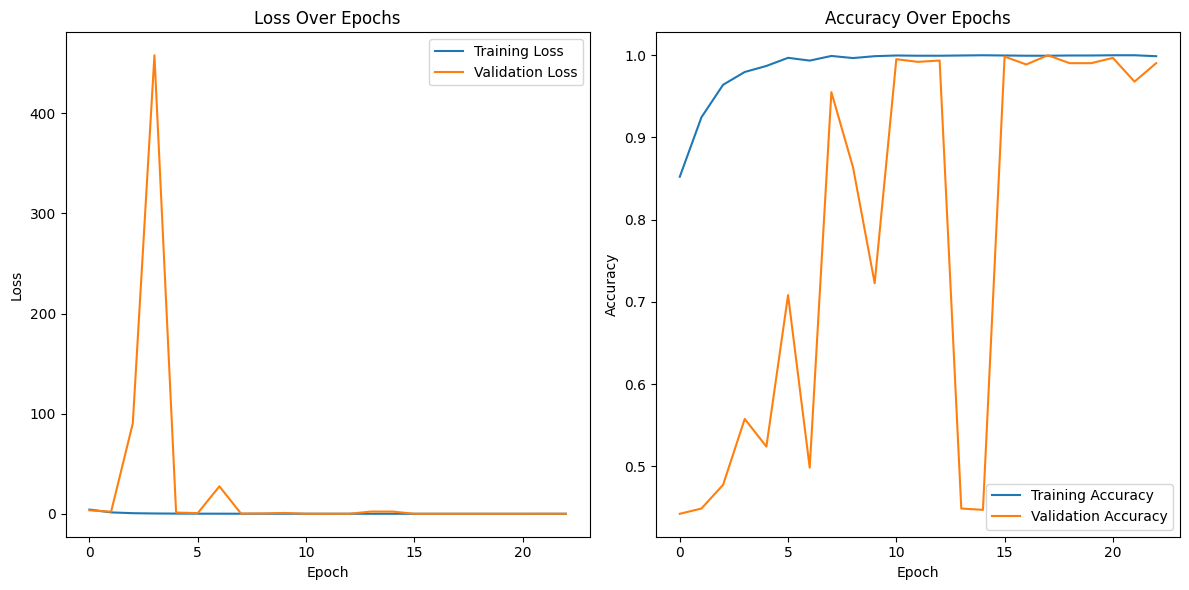

In [74]:
train_val(history_efficientnet)


In [75]:
eff_train_acc = [0.8522181510925293, 0.9245549440383911, 0.9641141295433044, 0.9796552658081055, 0.9870019555091858, 0.9968917965888977, 0.9935010075569153, 0.9991523027420044, 0.9966092109680176, 0.9988697171211243, 0.9997174143791199, 0.9994348883628845, 0.9994348883628845, 0.9997174143791199, 1.0, 0.9997174143791199, 0.9994348883628845, 0.9994348883628845, 0.9997174143791199, 0.9997174143791199, 1.0, 1.0, 0.9988697171211243]
for i in eff_train_acc:
    print(i)

0.8522181510925293
0.9245549440383911
0.9641141295433044
0.9796552658081055
0.9870019555091858
0.9968917965888977
0.9935010075569153
0.9991523027420044
0.9966092109680176
0.9988697171211243
0.9997174143791199
0.9994348883628845
0.9994348883628845
0.9997174143791199
1.0
0.9997174143791199
0.9994348883628845
0.9994348883628845
0.9997174143791199
0.9997174143791199
1.0
1.0
0.9988697171211243


In [76]:
eff_val_acc = [0.4423076808452606, 0.44871795177459717, 0.47756409645080566, 0.557692289352417, 0.5240384340286255, 0.7083333134651184, 0.49839743971824646, 0.9551281929016113, 0.8637820482254028, 0.7227563858032227, 0.995192289352417, 0.9919871687889099, 0.9935897588729858, 0.44871795177459717, 0.44711539149284363, 0.9983974099159241, 0.9887820482254028, 1.0, 0.9903846383094788, 0.9903846383094788, 0.9967948794364929, 0.9679487347602844, 0.9903846383094788]
for i in eff_val_acc:
    print(i)

0.4423076808452606
0.44871795177459717
0.47756409645080566
0.557692289352417
0.5240384340286255
0.7083333134651184
0.49839743971824646
0.9551281929016113
0.8637820482254028
0.7227563858032227
0.995192289352417
0.9919871687889099
0.9935897588729858
0.44871795177459717
0.44711539149284363
0.9983974099159241
0.9887820482254028
1.0
0.9903846383094788
0.9903846383094788
0.9967948794364929
0.9679487347602844
0.9903846383094788


[0.821135938167572, 0.8225487470626831, 0.8067250847816467, 0.8058773875236511, 0.7934444546699524, 0.8202882409095764, 0.8022040128707886, 0.8123763799667358, 0.830743134021759, 0.8479796648025513, 0.8525006771087646, 0.8660638332366943, 0.8606951236724854, 0.8748233914375305, 0.8883865475654602, 0.8994066119194031, 0.903362512588501, 0.9056230783462524, 0.918903648853302, 0.9180559515953064, 0.9254026412963867, 0.9361401796340942, 0.9347273111343384, 0.9381181001663208, 0.9454648494720459, 0.946877658367157, 0.9528115391731262, 0.9542243480682373, 0.9590279459953308, 0.9638316035270691]
[0.9487179517745972, 0.9711538553237915, 0.9022436141967773, 0.7788461446762085, 0.8653846383094788, 0.9391025900840759, 0.9519230723381042, 0.942307710647583, 0.9535256624221802, 0.9727563858032227, 0.9839743375778198, 0.9679487347602844, 0.9743589758872986, 0.9679487347602844, 0.9711538553237915, 0.9871794581413269, 0.9823718070983887, 0.9823718070983887, 0.9823718070983887, 0.9855769276618958, 0.99

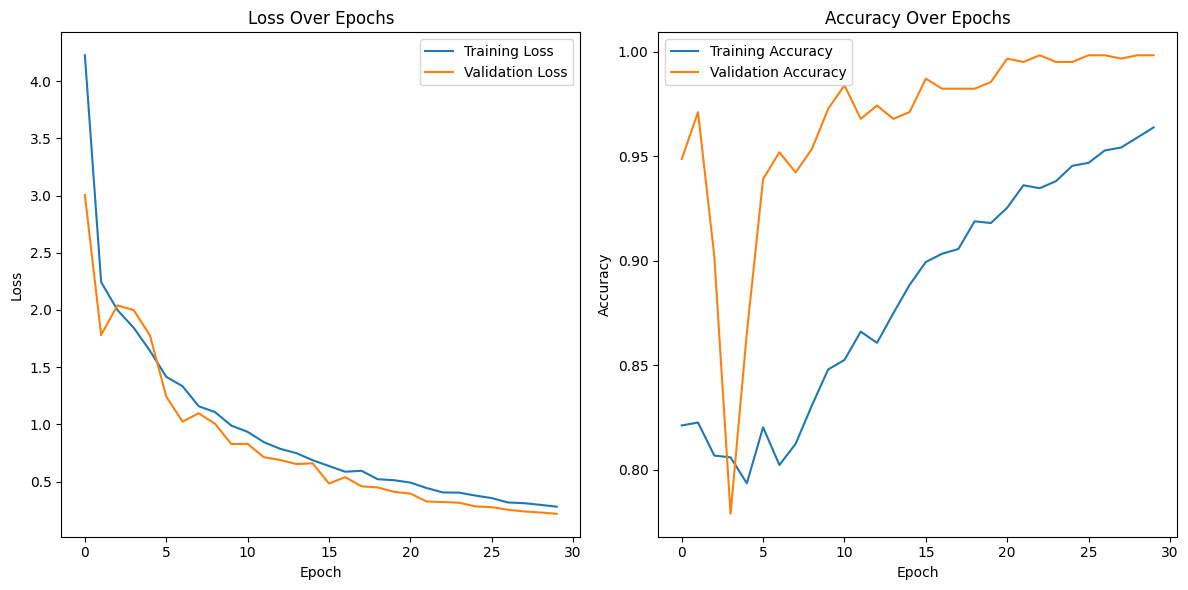

In [92]:
train_val(history_vgg)

In [95]:
vgg_train_acc =  [0.821135938167572, 0.8225487470626831, 0.8067250847816467, 0.8058773875236511, 0.7934444546699524, 0.8202882409095764, 0.8022040128707886, 0.8123763799667358, 0.830743134021759, 0.8479796648025513, 0.8525006771087646, 0.8660638332366943, 0.8606951236724854, 0.8748233914375305, 0.8883865475654602, 0.8994066119194031, 0.903362512588501, 0.9056230783462524, 0.918903648853302, 0.9180559515953064, 0.9254026412963867, 0.9361401796340942, 0.9347273111343384, 0.9381181001663208, 0.9454648494720459, 0.946877658367157, 0.9528115391731262, 0.9542243480682373, 0.9590279459953308, 0.9638316035270691]
for i in vgg_train_acc:
    print(i)

0.821135938167572
0.8225487470626831
0.8067250847816467
0.8058773875236511
0.7934444546699524
0.8202882409095764
0.8022040128707886
0.8123763799667358
0.830743134021759
0.8479796648025513
0.8525006771087646
0.8660638332366943
0.8606951236724854
0.8748233914375305
0.8883865475654602
0.8994066119194031
0.903362512588501
0.9056230783462524
0.918903648853302
0.9180559515953064
0.9254026412963867
0.9361401796340942
0.9347273111343384
0.9381181001663208
0.9454648494720459
0.946877658367157
0.9528115391731262
0.9542243480682373
0.9590279459953308
0.9638316035270691


In [96]:
vgg_val_acc = [0.9487179517745972, 0.9711538553237915, 0.9022436141967773, 0.7788461446762085, 0.8653846383094788, 0.9391025900840759, 0.9519230723381042, 0.942307710647583, 0.9535256624221802, 0.9727563858032227, 0.9839743375778198, 0.9679487347602844, 0.9743589758872986, 0.9679487347602844, 0.9711538553237915, 0.9871794581413269, 0.9823718070983887, 0.9823718070983887, 0.9823718070983887, 0.9855769276618958, 0.9967948794364929, 0.995192289352417, 0.9983974099159241, 0.995192289352417, 0.995192289352417, 0.9983974099159241, 0.9983974099159241, 0.9967948794364929, 0.9983974099159241, 0.9983974099159241]
for i in vgg_val_acc:
    print(i)

0.9487179517745972
0.9711538553237915
0.9022436141967773
0.7788461446762085
0.8653846383094788
0.9391025900840759
0.9519230723381042
0.942307710647583
0.9535256624221802
0.9727563858032227
0.9839743375778198
0.9679487347602844
0.9743589758872986
0.9679487347602844
0.9711538553237915
0.9871794581413269
0.9823718070983887
0.9823718070983887
0.9823718070983887
0.9855769276618958
0.9967948794364929
0.995192289352417
0.9983974099159241
0.995192289352417
0.995192289352417
0.9983974099159241
0.9983974099159241
0.9967948794364929
0.9983974099159241
0.9983974099159241


[0.7801638841629028, 0.7838372588157654, 0.7909013628959656, 0.8101158738136292, 0.8106809854507446, 0.8154845833778381, 0.8191579580307007, 0.8355467915534973, 0.8341339230537415, 0.8400678038597107, 0.8437411785125732, 0.8510878682136536, 0.8564566373825073, 0.8601299524307251, 0.8705849051475525, 0.870019793510437, 0.8621079325675964, 0.8677592277526855, 0.8646510243415833, 0.8810398578643799, 0.8779315948486328, 0.879626989364624, 0.8816049695014954, 0.8849957585334778, 0.8912122249603271, 0.8875388503074646, 0.8974286317825317, 0.8869737386703491, 0.8988415002822876, 0.895168125629425]
[0.879807710647583, 0.8814102411270142, 0.8237179517745972, 0.8846153616905212, 0.8910256624221802, 0.9006410241127014, 0.8605769276618958, 0.8958333134651184, 0.8846153616905212, 0.9070512652397156, 0.9054487347602844, 0.9134615659713745, 0.9214743375778198, 0.9198718070983887, 0.9246794581413269, 0.9182692170143127, 0.932692289352417, 0.9214743375778198, 0.9230769276618958, 0.9310897588729858, 0.9

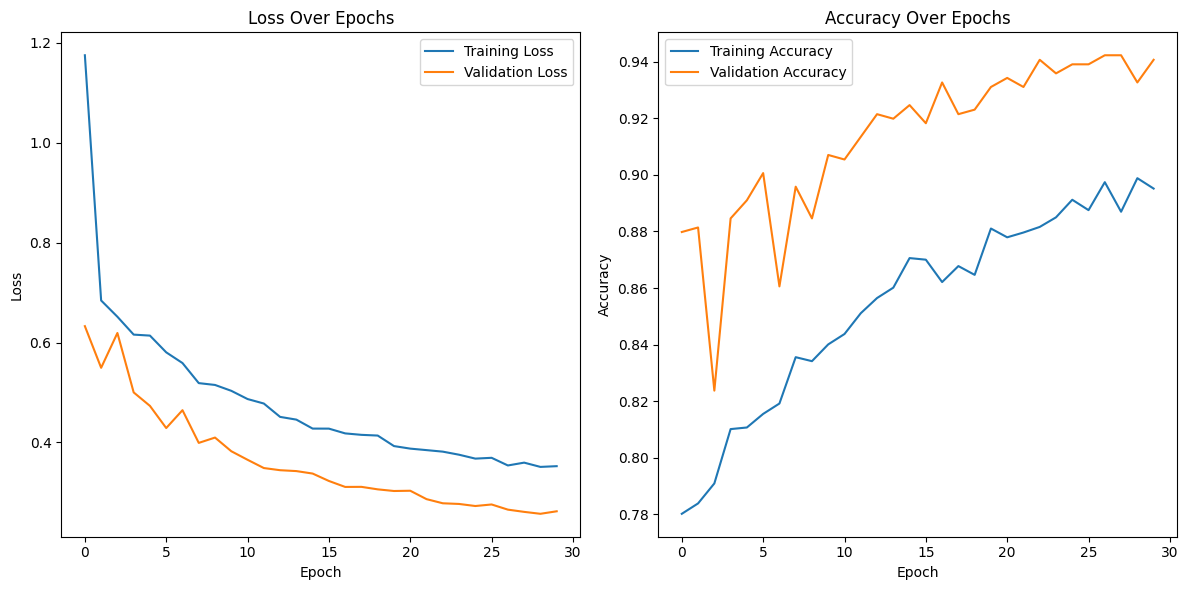

In [93]:
train_val(history_mobilenet)

In [97]:
mbn_train_acc = [0.7801638841629028, 0.7838372588157654, 0.7909013628959656, 0.8101158738136292, 0.8106809854507446, 0.8154845833778381, 0.8191579580307007, 0.8355467915534973, 0.8341339230537415, 0.8400678038597107, 0.8437411785125732, 0.8510878682136536, 0.8564566373825073, 0.8601299524307251, 0.8705849051475525, 0.870019793510437, 0.8621079325675964, 0.8677592277526855, 0.8646510243415833, 0.8810398578643799, 0.8779315948486328, 0.879626989364624, 0.8816049695014954, 0.8849957585334778, 0.8912122249603271, 0.8875388503074646, 0.8974286317825317, 0.8869737386703491, 0.8988415002822876, 0.895168125629425]
for i in mbn_train_acc:
    print(i)

0.7801638841629028
0.7838372588157654
0.7909013628959656
0.8101158738136292
0.8106809854507446
0.8154845833778381
0.8191579580307007
0.8355467915534973
0.8341339230537415
0.8400678038597107
0.8437411785125732
0.8510878682136536
0.8564566373825073
0.8601299524307251
0.8705849051475525
0.870019793510437
0.8621079325675964
0.8677592277526855
0.8646510243415833
0.8810398578643799
0.8779315948486328
0.879626989364624
0.8816049695014954
0.8849957585334778
0.8912122249603271
0.8875388503074646
0.8974286317825317
0.8869737386703491
0.8988415002822876
0.895168125629425


In [98]:
mbn_val_acc = [0.879807710647583, 0.8814102411270142, 0.8237179517745972, 0.8846153616905212, 0.8910256624221802, 0.9006410241127014, 0.8605769276618958, 0.8958333134651184, 0.8846153616905212, 0.9070512652397156, 0.9054487347602844, 0.9134615659713745, 0.9214743375778198, 0.9198718070983887, 0.9246794581413269, 0.9182692170143127, 0.932692289352417, 0.9214743375778198, 0.9230769276618958, 0.9310897588729858, 0.9342948794364929, 0.9310897588729858, 0.9407051205635071, 0.9358974099159241, 0.9391025900840759, 0.9391025900840759, 0.942307710647583, 0.942307710647583, 0.932692289352417, 0.9407051205635071]

for i in mbn_val_acc:
    print(i)

0.879807710647583
0.8814102411270142
0.8237179517745972
0.8846153616905212
0.8910256624221802
0.9006410241127014
0.8605769276618958
0.8958333134651184
0.8846153616905212
0.9070512652397156
0.9054487347602844
0.9134615659713745
0.9214743375778198
0.9198718070983887
0.9246794581413269
0.9182692170143127
0.932692289352417
0.9214743375778198
0.9230769276618958
0.9310897588729858
0.9342948794364929
0.9310897588729858
0.9407051205635071
0.9358974099159241
0.9391025900840759
0.9391025900840759
0.942307710647583
0.942307710647583
0.932692289352417
0.9407051205635071


[0.7770556807518005, 0.7911839485168457, 0.8010737299919128, 0.8095507025718689, 0.8024865984916687, 0.8154845833778381, 0.8259395360946655, 0.8270698189735413, 0.8460016846656799, 0.8389375805854797, 0.8428934812545776, 0.8556089401245117, 0.8612602353096008, 0.8688895106315613, 0.8638033270835876, 0.8674767017364502, 0.8787792921066284, 0.8835829496383667, 0.8776490688323975, 0.8847131729125977, 0.8881039619445801, 0.8917773365974426, 0.8960158228874207, 0.8895168304443359, 0.8977112174034119, 0.9092963933944702, 0.9030799865722656, 0.9005368947982788, 0.8988415002822876, 0.9067533016204834]
[0.8846153616905212, 0.8782051205635071, 0.8141025900840759, 0.9038461446762085, 0.9006410241127014, 0.9022436141967773, 0.8974359035491943, 0.9086538553237915, 0.8990384340286255, 0.9262820482254028, 0.9118589758872986, 0.9375, 0.9230769276618958, 0.9246794581413269, 0.9342948794364929, 0.9439102411270142, 0.9375, 0.9471153616905212, 0.9391025900840759, 0.942307710647583, 0.942307710647583, 0.94

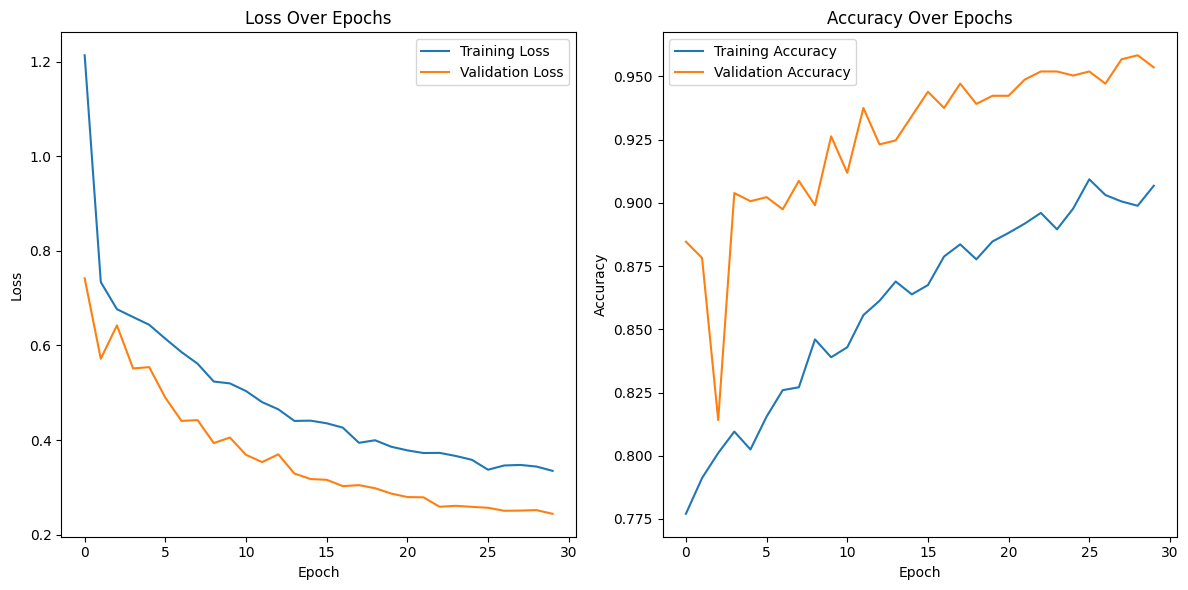

In [94]:
train_val(history_resnet50)

In [99]:
res_train_acc = [0.7770556807518005, 0.7911839485168457, 0.8010737299919128, 0.8095507025718689, 0.8024865984916687, 0.8154845833778381, 0.8259395360946655, 0.8270698189735413, 0.8460016846656799, 0.8389375805854797, 0.8428934812545776, 0.8556089401245117, 0.8612602353096008, 0.8688895106315613, 0.8638033270835876, 0.8674767017364502, 0.8787792921066284, 0.8835829496383667, 0.8776490688323975, 0.8847131729125977, 0.8881039619445801, 0.8917773365974426, 0.8960158228874207, 0.8895168304443359, 0.8977112174034119, 0.9092963933944702, 0.9030799865722656, 0.9005368947982788, 0.8988415002822876, 0.9067533016204834]
for i in res_train_acc:
    print(i)

0.7770556807518005
0.7911839485168457
0.8010737299919128
0.8095507025718689
0.8024865984916687
0.8154845833778381
0.8259395360946655
0.8270698189735413
0.8460016846656799
0.8389375805854797
0.8428934812545776
0.8556089401245117
0.8612602353096008
0.8688895106315613
0.8638033270835876
0.8674767017364502
0.8787792921066284
0.8835829496383667
0.8776490688323975
0.8847131729125977
0.8881039619445801
0.8917773365974426
0.8960158228874207
0.8895168304443359
0.8977112174034119
0.9092963933944702
0.9030799865722656
0.9005368947982788
0.8988415002822876
0.9067533016204834


In [101]:
res_val_acc = [0.8846153616905212, 0.8782051205635071, 0.8141025900840759, 0.9038461446762085, 0.9006410241127014, 0.9022436141967773, 0.8974359035491943, 0.9086538553237915, 0.8990384340286255, 0.9262820482254028, 0.9118589758872986, 0.9375, 0.9230769276618958, 0.9246794581413269, 0.9342948794364929, 0.9439102411270142, 0.9375, 0.9471153616905212, 0.9391025900840759, 0.942307710647583, 0.942307710647583, 0.9487179517745972, 0.9519230723381042, 0.9519230723381042, 0.9503205418586731, 0.9519230723381042, 0.9471153616905212, 0.9567307829856873, 0.9583333134651184, 0.9535256624221802]
for i in res_val_acc:
    print(i)


0.8846153616905212
0.8782051205635071
0.8141025900840759
0.9038461446762085
0.9006410241127014
0.9022436141967773
0.8974359035491943
0.9086538553237915
0.8990384340286255
0.9262820482254028
0.9118589758872986
0.9375
0.9230769276618958
0.9246794581413269
0.9342948794364929
0.9439102411270142
0.9375
0.9471153616905212
0.9391025900840759
0.942307710647583
0.942307710647583
0.9487179517745972
0.9519230723381042
0.9519230723381042
0.9503205418586731
0.9519230723381042
0.9471153616905212
0.9567307829856873
0.9583333134651184
0.9535256624221802
